# Examining Racial Discrimination in the US Job Market

### Background
Racial discrimination continues to be pervasive in cultures throughout the world. Researchers examined the level of racial discrimination in the United States labor market by randomly assigning identical résumés to black-sounding or white-sounding names and observing the impact on requests for interviews from employers.

### Data
In the dataset provided, each row represents a resume. The 'race' column has two values, 'b' and 'w', indicating black-sounding and white-sounding. The column 'call' has two values, 1 and 0, indicating whether the resume received a call from employers or not.

Note that the 'b' and 'w' values in race are assigned randomly to the resumes when presented to the employer.

### Exercises
You will perform a statistical analysis to establish whether race has a significant impact on the rate of callbacks for resumes.

Answer the following questions **in this notebook below and submit to your Github account**. 

   1. What test is appropriate for this problem? Does CLT apply?
   2. What are the null and alternate hypotheses?
   3. Compute margin of error, confidence interval, and p-value. Try using both the bootstrapping and the frequentist statistical approaches.
   4. Write a story describing the statistical significance in the context or the original problem.
   5. Does your analysis mean that race/name is the most important factor in callback success? Why or why not? If not, how would you amend your analysis?

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources
+ Experiment information and data source: http://www.povertyactionlab.org/evaluation/discrimination-job-market-united-states
+ Scipy statistical methods: http://docs.scipy.org/doc/scipy/reference/stats.html 
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
+ Formulas for the Bernoulli distribution: https://en.wikipedia.org/wiki/Bernoulli_distribution

In [13]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

In [2]:
data = pd.io.stata.read_stata('data/us_job_market_discrimination.dta')

In [3]:
# number of callbacks for black-sounding names
sum(data[data.race=='b'].call)

157.0

In [4]:
# number of callbacks for white-sounding names
p_w = sum(data[data.race=='w'].call)

In [5]:
# sample of the data set
data.head()

,id,ad,education,ofjobs,yearsexp,honors,volunteer,military,empholes,occupspecific,...,compreq,orgreq,manuf,transcom,bankreal,trade,busservice,othservice,missind,ownership
0,b,1,4,2,6,0,0,0,1,17,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
1,b,1,3,3,6,0,1,1,0,316,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
2,b,1,4,1,6,0,0,0,0,19,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
3,b,1,3,4,6,0,1,0,1,313,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
4,b,1,3,3,22,0,0,0,0,313,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,Nonprofit


In [6]:
data.columns

Index(['id', 'ad', 'education', 'ofjobs', 'yearsexp', 'honors', 'volunteer',
       'military', 'empholes', 'occupspecific', 'occupbroad', 'workinschool',
       'email', 'computerskills', 'specialskills', 'firstname', 'sex', 'race',
       'h', 'l', 'call', 'city', 'kind', 'adid', 'fracblack', 'fracwhite',
       'lmedhhinc', 'fracdropout', 'fraccolp', 'linc', 'col', 'expminreq',
       'schoolreq', 'eoe', 'parent_sales', 'parent_emp', 'branch_sales',
       'branch_emp', 'fed', 'fracblack_empzip', 'fracwhite_empzip',
       'lmedhhinc_empzip', 'fracdropout_empzip', 'fraccolp_empzip',
       'linc_empzip', 'manager', 'supervisor', 'secretary', 'offsupport',
       'salesrep', 'retailsales', 'req', 'expreq', 'comreq', 'educreq',
       'compreq', 'orgreq', 'manuf', 'transcom', 'bankreal', 'trade',
       'busservice', 'othservice', 'missind', 'ownership'],
      dtype='object')

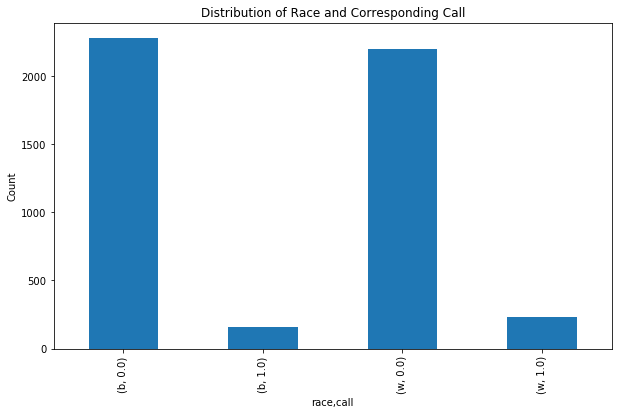

In [7]:
# plot the number of calls based on the race
plt.figure(figsize=(10,6))
data.groupby(['race', 'call'])['id'].count().plot(kind='bar')
plt.ylabel('Count')
plt.title('Distribution of Race and Corresponding Call')
plt.show()

In [8]:
# find the size of the data distribution 
print("Size of the total data distribution {}".format(data.shape[0]))
print("Size of the distribution of Black candidates {}".format(len(data[data.race=='b'])))
print("Size of the distribution of White candidates {}".format(len(data[data.race=='w'])))

Size of the total data distribution 4870
Size of the distribution of Black candidates 2435
Size of the distribution of White candidates 2435


The Central Limit Theorem assumes that the sample distribution meets the following conditions:

1. The data must be large enough. Conventionally, a sample with sample size exceeding 30 is considered to be a large sample. At the same time the sample size cannot exceed 10% the population size. 

2. The data must be collected randomly. Randomized distribution reduces the chances of biased data, which in trun avoids the risk of erroneous inferences about the population. 

3. Each individual observation must be independent of other. If the data is sampled without replacement, individual observations aren't technically independent, since removing each observation changes the population. However, if we sample 10% or less of the population, we can treat individual observations as independent, for removing each observation doesn't change that much.

The data is sampled randomly without replacement. Size of the distribution is 4870 (n>30), which is large enough. Each observation in the data is independent of others. The sizes of the distributions of black-sounding and white-sounding data(n=2435) are equal and larger enough (n>30). Therefore, the data as whole as well as the race-wise distributions **meet the conditions of the central limit theorem**. Frequintists tests like t-test are applicable to the distributions. 

In order to observe the effect of race on the employment call, we will use black-sounding samples and white-sounding samples for the hypothesis tests. The distributions are independent and sampled randomly. The size of the distributions are bigger than 30. Hence, we will use **two sample z-test**.

**Hypothesis test**

We will use z-test to check if the proportion of the interview call depends on the race of the cadidate. If the proportions of the interview call for both distributions are approximately equal, the race does not have any influence on the interview call. If the hypothesis is rejected, it will be confirmed that there is a statistically sigficant racial discrimination in the interview process.


Null Hypothesis $ H_0 $ : Proportion of interview call for white sounding resume $ P_w $ = Proportion of interview call for black sounding resume $ P_b $

Alternative Hypothesis $ H_a $ : Proportion of interview call for white sounding resume $ P_w \neq$ Proportion of interview call for black sounding resume $ P_b $ 



In [9]:
w = data[data.race=='w']
b = data[data.race=='b']

In [10]:
# Your solution to Q3 here
from statsmodels.stats.weightstats import ztest

p_val = ztest(x1=w.call, x2=b.call)[1]

print("\n")
if p_val > 0.05:
    print("P value is {:0.5f}, which is bigger than the confidence level 0.05. The H0 is not rejected. Interview call does not depend on race.".format(p_val))
else:
    print("P value is {:0.5f}, which is smaller than the confidence level 0.05. The H0 is rejected. Interview call does depend on race.".format(p_val))



P value is 0.00004, which is smaller than the confidence level 0.05. The H0 is rejected. Interview call does depend on race.


In [11]:
p_b = sum(data[data.race=='b'].call)/len(b)
p_w = sum(data[data.race=='w'].call)/len(w)
p = (p_b + p_w)/2
deno = p*(1-p)/len(w)
conf_interval = [p - 1.96 * np.sqrt(deno), p + 1.96 * np.sqrt(deno)]
margin_of_error = 1.96 * np.sqrt(deno)

print("Confidence Interval : {}".format(conf_interval))
print("Margin of Error : {:0.6f}".format(margin_of_error))

Confidence Interval : [0.069686869317152372, 0.091298756966215172]
Margin of Error : 0.010806


**Story Telling**

Racism is one of the crucial part of the US history. Even today, there is an belief among the minorities that racist attitude exists among the people. You may have noticed the news of discrimination in every sector of the society. By law, racism is not allowed in the legal sectors, but a common complain of racism issues are commmon among the minorities. A random sample of resumes with similar qualifications are experimented. The sample is equally distributed in two categories: black-sounding and white-sounding. Through the statistical analysis, we found that in the samples of 2435 white-sounding and 2435 black-sounding, the number of the interview call was not equal in the two groups. We found that race has a **significant influence on the interview calls.**  